<a href="https://colab.research.google.com/github/rkarthiksub/MachineLearningNotebooks/blob/master/Polynomial_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

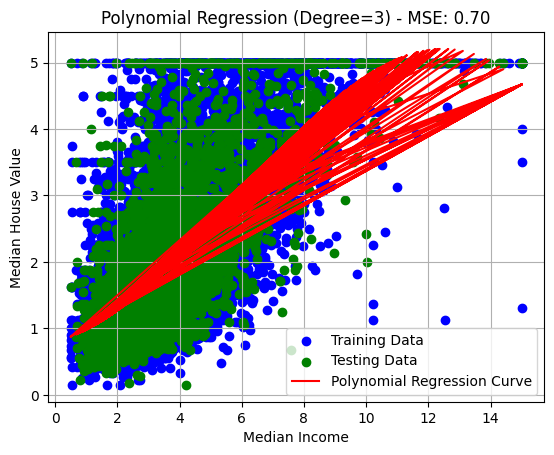

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = data.target

# Select a single feature (e.g., median income) for simplicity
X = df['MedInc'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Create PolynomialFeatures to transform the feature into a polynomial
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Plot the original data and the polynomial regression curve
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='red', label='Polynomial Regression Curve')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title(f'Polynomial Regression (Degree=3) - MSE: {mse:.2f}')
plt.legend()
plt.grid(True)

plt.show()
